# QISKIT ::
Qiskit is an open-source framework for quantum computing.
It provides tools for creating and manipulating quantum programs 
and running them on prototype quantum devices 
on IBM Q Experience or on simulators on a local computer


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import qiskit

In [2]:
df = pd.read_csv("C:\\Datasets\\parkinson\\parkinsons.csv")

In [3]:
df.head() # This dataset contains parkinsons prediction based on 22 features ,I will use only 5 together with Quantum Machine Learning

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
# I ll use the first 100 entries
df = df.head(100)

In [5]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [6]:
select_columns =[ 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ'
       ]

In [7]:
df[select_columns].corr()**2

,MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ
MDVP:Fhi(Hz),1.000000,0.103404,0.157753,0.078285,0.085364
MDVP:Flo(Hz),0.103404,1.000000,0.289037,0.197337,0.197789
MDVP:Jitter(Abs),0.157753,0.289037,1.000000,0.828235,0.872636
MDVP:RAP,0.078285,0.197337,0.828235,1.000000,0.825656
MDVP:PPQ,0.085364,0.197789,0.872636,0.825656,1.000000


In [8]:
select_columns 

['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ']

In [9]:
df.drop(['name'],axis=1,inplace=True)

In [10]:
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [11]:
df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [12]:
df.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [13]:
X = df[select_columns].values
y = df['status']

In [14]:
# I will scale my values so that they become more effective should we do any modelling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)

In [17]:
X_train.shape ,y_train.shape

((80, 5), (80,))

In [18]:
from qiskit import QuantumRegister,QuantumCircuit,Aer,IBMQ,ClassicalRegister


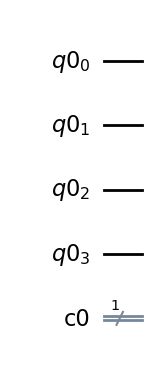

In [19]:
# Instantiate our quantum variables
N =4
q = QuantumRegister(N)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.draw("mpl")

In [20]:
import pylatexenc

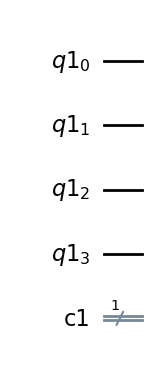

In [21]:
N =4
q = QuantumRegister(N)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.draw("mpl")

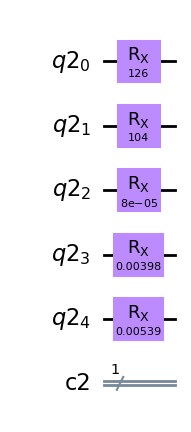

In [22]:
# Rotate the cubits around these angles
# The process is called feature mapping where we map our data into a quantum processor
N =5
q = QuantumRegister(N)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
for i,x in enumerate(X_train[0]):
    qc.rx(x,i)
qc.draw("mpl")


In [23]:
# I will create a function that maps our features
def map_features(x):
    q = QuantumRegister(5)
    # 22 is the number of features that we need to map 
    c = ClassicalRegister(1)
    qc = QuantumCircuit(q,c)
    for i,x in enumerate(x):
        qc.rx(x,1)
    return qc,c
    

In [24]:
map_features(X_train[0])

(<qiskit.circuit.quantumcircuit.QuantumCircuit at 0x12d4e2ea640>,
 ClassicalRegister(1, 'c3'))

# Measuring The Quantum Circuits and Getting the Outputs

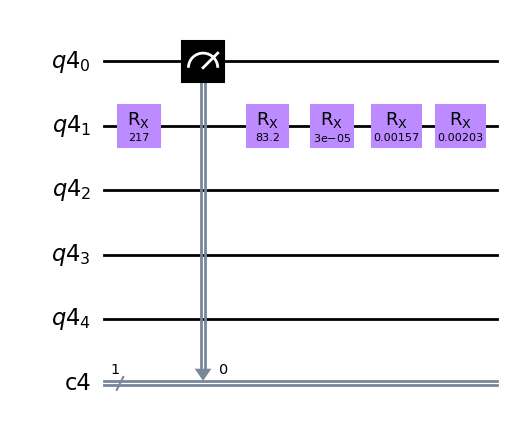

In [25]:

qc,c = map_features(X_train[5])
qc.measure(0,c)
qc.draw("mpl") # The Outputs will be either a 0 or 1 so to achieve this we will introduce :Variational Outputs

# Variational Outputs

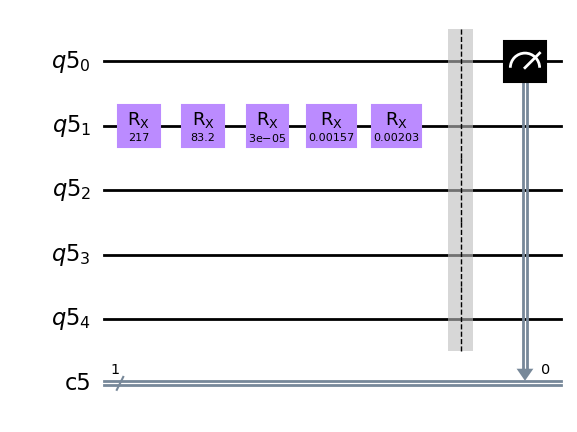

In [26]:
# To get variational outputs we use the .barrier() method
qc,c = map_features(X_train[5])
qc.barrier()
qc.measure(0,c)
qc.draw("mpl")

In [27]:
# Creating a function that returns our variational outputs
def variational_circuits(qc, thetha):
    # thetha is the angle of rotation of our cubits
    for i in range(N-1):
        qc.cnot(i,i+1)
    qc.cnot(N-1,0)
    for i in range(N):
        qc.ry(thetha[i],i)
    return qc

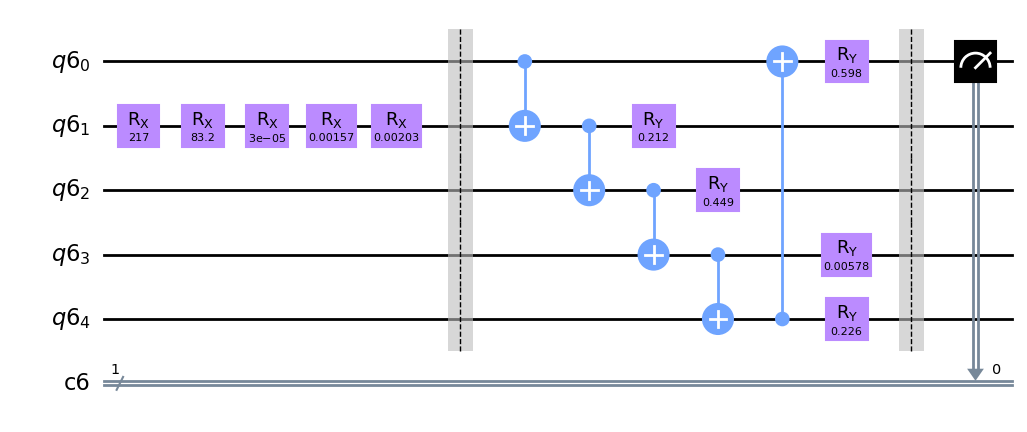

In [28]:
# Using previous example of 5 Variables

"""We have rotated our cubits around these angles ,what follows is that after the rotation of these cubits have to be rotated and 
later on encoded into classical numbers.Rotating the cubits is really just the simplest way of getting the data into  the 
QUANTUM PROCESS

As shown in the figure the rotation clearly indicates that there could be a possibility of creating predictions"""
qc,c = map_features(X_train[5])
qc.barrier()
qc = variational_circuits(qc,thetha= np.random.rand(6))
qc.barrier()
qc.measure(0,c)
qc.draw("mpl")

# QUANTUM NEURAL NETWORK

In [29]:
1E4

10000.0

In [30]:
def quantum_neural(X,thetha,simulation=True):
    """This function returns a prediction"""
    qc,c = map_features(X)
    qc =variational_circuits(qc,thetha)
    qc.measure(0,c)
    shots = 1e4
    backend = Aer.get_backend("qasm_simulator")
    job = qiskit.execute(qc,backend,shots=shots)
    result =job.result()
    counts = result.get_counts(qc)
    return counts["1"]/shots

In [31]:
prediction = quantum_neural(X_train[5],np.random.rand(N))

In [32]:
prediction

0.242

In [33]:
target = y_train[5]

In [34]:
# I will create a Loss function based on the target and prediction
loss = (target-prediction)**2

In [35]:
loss

0.574564

# PERFORMING A STOCHASTIC GRADIENT DESCENT ::

In [36]:
import copy
# I will create a Loss function
def loss_function(target,prediction):
    loss = (target-prediction)**2
    return loss
    
# A gradient descent function
def gradient(X,y,thetha):
    delta = 0.01
    gradient = []
    for i in range(len(thetha)):
        dhetha = copy.copy(thetha)
        dhetha[i]+=delta
        pred_1 = quantum_neural(X,dhetha)
        pred_2 = quantum_neural(X,thetha)
        gradient.append((loss_function(pred_1,y)-loss_function(pred_2,y))/delta)
    return np.array(gradient)
# An accuracy function
def accuracy_fn(X,y,thetha):
    counter = 0
    for X1,y1 in zip(X,y):
        prediction = quantum_neural(X1,thetha)
        if prediction < 0.5 and y1 ==0:
            counter+=1
        elif prediction >= 0.5 and y1==1 :
            counter+=1
    return counter/len(y)


In [37]:
loss_list = []

In [38]:
loss_list

[]

In [ ]:
# Calculating and Tracking the Training AC
eta = 0.05
loss_list = []
thetha = np.ones(N)
epochs = 10
print(f"Epochs\t  Loss\t  Training accuracy")
for i in range(20):
    loss_tmp = []
    for X1,y1 in zip(X_train,y_train):
        prediction = quantum_neural(X1,thetha)
        loss_tmp.append(loss_function(prediction,y1))
        thetha = thetha - eta * gradient(X1,y1,thetha)
    loss_list.append(np.mean(loss_tmp))
    acc = accuracy_fn(X_train,y_train,thetha)
    print(f"{i} \t {loss_list[-1]:.3f} \t {acc:.3f}")

Epochs	  Loss	  Training accuracy
0 	 0.268 	 0.537
1 	 0.251 	 0.463
2 	 0.262 	 0.512
3 	 0.253 	 0.562
4 	 0.257 	 0.450
5 	 0.261 	 0.463
6 	 0.277 	 0.463
7 	 0.256 	 0.537
8 	 0.267 	 0.550
9 	 0.256 	 0.575
10 	 0.257 	 0.575
11 	 0.251 	 0.463
12 	 0.256 	 0.575
13 	 0.251 	 0.463
14 	 0.263 	 0.537
15 	 0.262 	 0.537


In [39]:
X_train.shape

(80, 5)

In [52]:
thetha = np.ones(5)

In [53]:
print(f"The Accuracy of our Quantum ML model is {(accuracy_fn(X_test,y_test,thetha))*100}%")

The Accuracy of our Quantum ML model is 65.0%
